# Object Detection With Data Augmentation

### Creating paths and directories

In [ ]:
import os, shutil

# This is origional directory path of folder where all datasets resides 
original_dataset_dir = 'E:\Study\IBA BSCS-VIII\Data Science'

# This is base directory where we will store our data for processing
base_dir = os.path.join(original_dataset_dir,"caltech-prepared-with-augmentation")

# Creating base directory
if not os.path.exists(base_dir):
    os.mkdir(base_dir)
    
# This is folder where all data will be placed
all_data = os.path.join(base_dir,"all_data")
# This is train data directory path
train_dir = os.path.join(base_dir,"train")
# This is test data directory path
test_dir = os.path.join(base_dir,"test")
# This is validation data directory path
val_dir = os.path.join(base_dir,"val")


# Creating all directories
 
if not os.path.exists(all_data):
    os.mkdir(all_data)

if not os.path.exists(train_dir):
    os.mkdir(train_dir)

if not os.path.exists(test_dir):
    os.mkdir(test_dir)
    
if not os.path.exists(val_dir):
    os.mkdir(val_dir)

In [ ]:
# Here are all the paths from where we will get data for storing where we have to process data
data_dir_src = os.path.join(original_dataset_dir,"caltech-prepared")
data_dir_src_train = os.path.join(data_dir_src,"train")
data_dir_src_test = os.path.join(data_dir_src,"test")
data_dir_src_val = os.path.join(data_dir_src,"val")

### Coping files from source and pasting into destination

In [ ]:
# Listing directory of train files
directories = os.listdir(data_dir_src_train)
# Getting folder name of each class
for eachclass in directories:
    dst_dir = os.path.join(all_data,eachclass)
    # Creating folder in all_data directory 
    if not os.path.exists(dst_dir):
        os.mkdir(dst_dir)
    src_dir_path = os.path.join(data_dir_src_train,eachclass)
    instances = os.listdir(src_dir_path)
    # Here we will copy each instance from train directory and paste it in all_data directory in corresponding class 
    for instance in instances:
        src = os.path.join(src_dir_path,instance)
        dst = os.path.join(dst_dir,instance)
        shutil.copyfile(src,dst)

In [ ]:
# Listing directory of test files
directories = os.listdir(data_dir_src_test)
for eachclass in directories:
    dst_dir = os.path.join(all_data,eachclass)
    if not os.path.exists(dst_dir):
        os.mkdir(dst_dir)
    src_dir_path = os.path.join(data_dir_src_test,eachclass)
    instances = os.listdir(src_dir_path)
    # Here we will copy each instance from test directory and paste it in all_data directory in corresponding class 
    for instance in instances:
        src = os.path.join(src_dir_path,instance)
        dst = os.path.join(dst_dir,instance)
        shutil.copyfile(src,dst)

In [ ]:
# Listing directory of validation files
directories = os.listdir(data_dir_src_val)
for eachclass in directories:
    dst_dir = os.path.join(all_data,eachclass)
    if not os.path.exists(dst_dir):
        os.mkdir(dst_dir)
    src_dir_path = os.path.join(data_dir_src_val,eachclass)
    instances = os.listdir(src_dir_path)
    # Here we will copy each instance from validation directory and paste it in all_data directory in corresponding class 
    for instance in instances:
        src = os.path.join(src_dir_path,instance)
        dst = os.path.join(dst_dir,instance)
        shutil.copyfile(src,dst)

### Visualizing current/existing data for each class

In [ ]:
# We have copied all the files into one folder all_data now we will use data from there
# Corresponding paths to use

# all_data
# train_dir
# test_dir
# val_dir

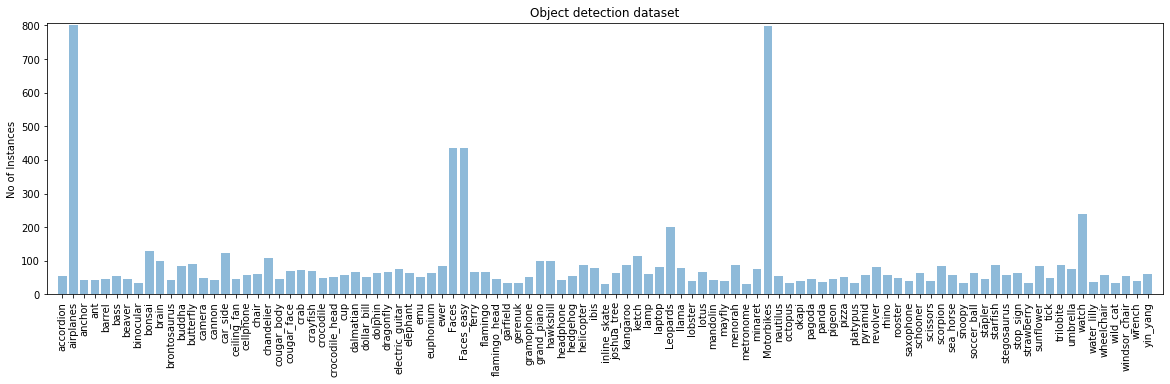

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,5))
plt.margins(0.01)

classes = os.listdir(all_data)
pos = np.arange(len(classes))
instances = []
for eachclass in classes:
    instance_path = os.path.join(all_data,eachclass)
    instances.append(len(os.listdir(instance_path)))
    
plt.bar(pos, instances, align='center', alpha=0.5)
plt.xticks(pos, classes,rotation='vertical',fontsize=10)
plt.ylabel('No of Instances')
plt.title('Object detection dataset')

plt.show()

In [ ]:
# Converting data into dataframe fot visualizing dataset
import pandas as pd

df = pd.DataFrame(list(zip(classes,instances)),columns=["Classes","Number of Instance"])
df

,Classes,Number of Instance
0,accordion,55
1,airplanes,800
2,anchor,42
3,ant,42
4,barrel,47
...,...,...
96,wheelchair,59
97,wild_cat,34
98,windsor_chair,56
99,wrench,39


### Counting classes which have less than 100 instances

In [ ]:
# There are two ways to do this

# First is to count through dataframe

print("Classes having less than 100 instances ",len(df[df["Number of Instance"]<100]))

# Second is through converting instances into numpy array
np_instances = np.array(instances)

print("Classes having less than 100 instances ",len(np_instances[np_instances<100]))


Classes having less than 100 instances  90
Classes having less than 100 instances  90


### To balance data lets do data augmentation

In [ ]:
import random
from scipy import ndarray

# image processing library
import skimage as sk
from skimage import transform
from skimage import util
from skimage import io



def random_rotation(image_array: ndarray):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-25, 25)
    return sk.transform.rotate(image_array, random_degree)

def random_noise(image_array: ndarray):
    # add random noise to the image
    return sk.util.random_noise(image_array)

def horizontal_flip(image_array: ndarray):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return image_array[:, ::-1]

# dictionary of the transformations we defined earlier
available_transformations = {
    'rotate': random_rotation,
    'noise': random_noise,
#     'horizontal_flip': horizontal_flip
    'flip': horizontal_flip
}

# Here we will define a function which will call all above functions
def augmentImage(command,arg):
    return available_transformations[command](arg)

In [ ]:
for eachclass in classes:
    tmp = os.path.join(all_data,eachclass)    
    instances = os.listdir(tmp)
    # Total number of instances in each class
    no_of_instances = len(instances)
    # To scale 1000 instances in each class starting loop from current instances to 1000
    for i in range(no_of_instances,1001,1):
        ins = instances[i % no_of_instances]
        # src path of image
        img_path = os.path.join(tmp,ins)
        img_to_augment = sk.io.imread(img_path)
        img = ""
        name = ""
        rnd = random.randint(1,3)
        # Augmenting image
        if rnd == 1:
            img = augmentImage("flip",img_to_augment)
            name = "_flipped"+str(i)+".jpg"
        elif rnd == 2:
            img = augmentImage("rotate",img_to_augment)
            name = "_rotated"+str(i)+".jpg"
        else:
            img = augmentImage("noise",img_to_augment)
            name = "_noise"+str(i)+".jpg"
        dst = os.path.join(tmp,name)

        io.imsave(dst,img)

NameError: name 'classes' is not defined

In [ ]:
orignal = []
flipped = []
noisy = []
rotated = []
total = []

for eachclass in classes:
    tmp = os.path.join(all_data,eachclass)
    instances = os.listdir(tmp)
    total.append(len(instances))
    
    _orignal = 0
    _flipped = 0
    _noisy = 0
    _rotated = 0
    # counting eachntype
    for ins in instances:
        if ins[0:3] == "ima":
            _orignal += 1
        elif ins[0:3] == "_fl":
            _flipped += 1
        elif ins[0:3] == "_no":
            _noisy += 1
        else:
            _rotated += 1
            
    orignal.append(_orignal)
    flipped.append(_flipped)
    noisy.append(_noisy)
    rotated.append(_noisy)
    

df = pd.DataFrame(list(zip(classes,total,orignal,flipped,noisy,rotated)),columns=["Classes",
                                "Number of Instance","orignal","flipped","noisy","rotated"])

df

,Classes,Number of Instance,orignal,flipped,noisy,rotated
0,accordion,1001,55,310,317,317
1,airplanes,1001,800,55,77,77
2,anchor,1001,42,316,325,325
3,ant,1001,42,305,344,344
4,barrel,1001,47,316,337,337
...,...,...,...,...,...,...
96,wheelchair,1001,59,332,321,321
97,wild_cat,1001,34,326,302,302
98,windsor_chair,1001,56,316,315,315
99,wrench,1001,39,328,306,306


### Visualizing dataset once again

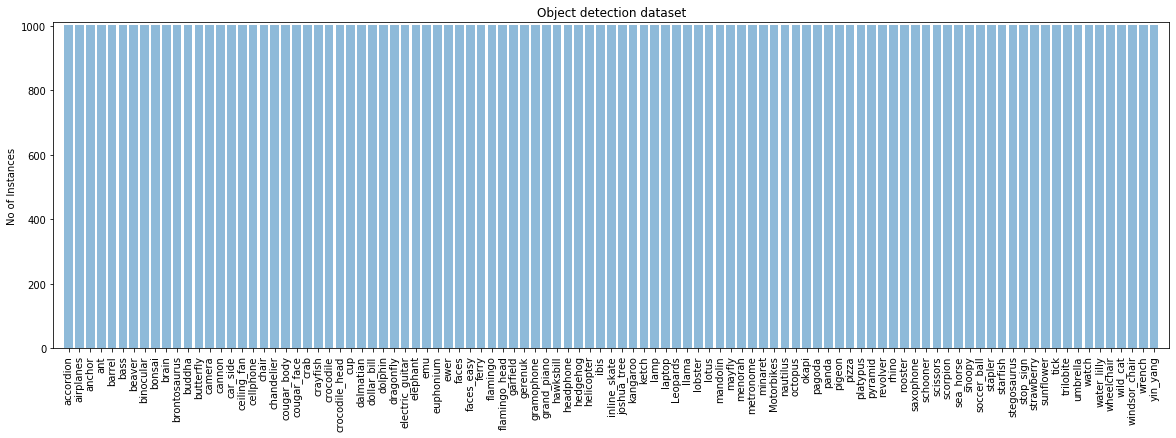

In [ ]:
plt.figure(figsize=(20,6))
plt.margins(0.01)

classes = os.listdir(all_data)
pos = np.arange(len(classes))

plt.bar(pos, total, align='center', alpha=0.5)
plt.xticks(pos, classes,rotation='vertical',fontsize=10)
plt.ylabel('No of Instances')
plt.title('Object detection dataset')

plt.show()

### Preparing data for processing

In [ ]:
# Here we will divide data into 70 : 30 ration 70 for test and 30 for test
# From 30 data further divided into 15 for test and 15 for validation

classes = sorted(classes)

for eachclass in classes:
    
    path = os.path.join(all_data,eachclass)
    instances = sorted(os.listdir(path))
    
    train_path = os.path.join(train_dir,eachclass)
    test_path = os.path.join(test_dir,eachclass)
    val_path = os.path.join(val_dir,eachclass)
    
    if not os.path.exists(test_path):
        os.mkdir(test_path)
        
    if not os.path.exists(train_path):
        os.mkdir(train_path)
        
    if not os.path.exists(val_path):
        os.mkdir(val_path)        

    for i in range(1001):
        
        ins = instances[i]        
        src = os.path.join(path,ins)
        dst = ""
        if i < 700:
            dst = os.path.join(train_path,ins)
        elif i < 850:
            dst = os.path.join(val_path,ins)
        else:
            dst = os.path.join(test_path,ins)
        
        shutil.copyfile(src,dst)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=60,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=60,
        class_mode='categorical')

Using TensorFlow backend.


Found 70700 images belonging to 101 classes.
Found 15150 images belonging to 101 classes.


In [ ]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(101, activation='softmax'))

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
______________________

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50)

model.save('object_detection_with_augmention.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/5





100/100 [==============================] - 657s 7s/step - loss: 4.5984 - acc: 0.0212 - val_loss: 4.5555 - val_acc: 0.0243
Epoch 2/5
100/100 [==============================] - 584s 6s/step - loss: 4.4040 - acc: 0.0562 - val_loss: 4.3251 - val_acc: 0.0870
Epoch 3/5
100/100 [==============================] - 584s 6s/step - loss: 4.0458 - acc: 0.1213 - val_loss: 4.2044 - val_acc: 0.1153
Epoch 4/5
100/100 [==============================] - 591s 6s/step - loss: 3.6704 - acc: 0.1852 - val_loss: 4.0203 - val_acc: 0.1700
Epoch 5/5
100/100 [==============================] - 589s 6s/step - loss: 3.4455 - acc: 0.2268 - val_loss: 3.9614 - val_acc: 0.1990


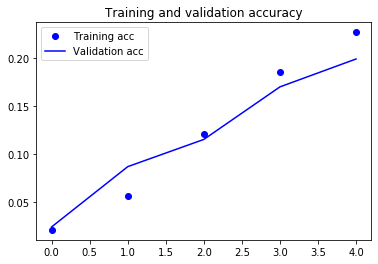

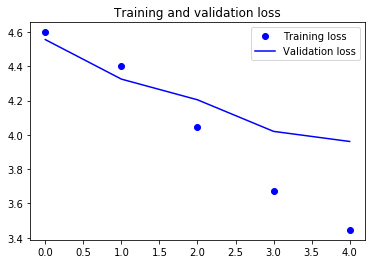

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

ant


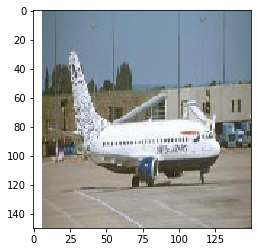

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img
import numpy as np


classifier = load_model('object_detection_with_augmention.h5')

classes = os.listdir(test_dir)

images_path = os.path.join(test_dir,classes[1])

images = os.listdir(images_path)

image_path = os.path.join(images_path, images[0])

sample = load_img(image_path, target_size=(150,150,3))
plt.imshow(sample)
sample = np.expand_dims(sample, axis=0)

prediction = classifier.predict(sample)

print(classes[np.argmax(prediction)])